
# User Manual
## 1. How to get the NFEM teaching tool
The NFEM teaching tool is hosted on gitlab.lrz.de. 

You can create an account using your TUM-id. If you follow the link below, you will see a list of the releases of the NFEM tool.
Please always download the latest version if nothing else is announced.

https://gitlab.lrz.de/chair_of_structural_analysis/NFEM_Teaching_Tool/tags


Download the .zip file and **unzip** it somewhere on your hard disk.

### 1.2 Get it using Git
If you are experienced with Git, you can also clone the repository.

### 1.3 Prerequisites

It is recommended to use the NFEM teaching tool with Anaconda for Python3: https://www.anaconda.com/download/
The following python modules are needed (all of them are included in the Anaconda installation):
- numpy
- matplotlib

## 2. Run a first example

The NFEM teaching tool is a python toolbox that can be imported in any python script. 
In the following, a simple example of a two-bar truss will be used to show the main functionalities. 
The main steps are:
- create an empty python file
- import the necessary modules
- preprocessing
- solution
- postprocessing

#### Running with Spyder (ipython)

If you are running the NFEM teaching tool with 'Spyder' you need to change a setting so that animations can be shown.
Type ```%matplotlib tk``` in the console before running the script. This needs to be done every time you reopen Spyder.

To change it permanently, go to ```Tools-Preferences-Ipython console-Graphics-Backend``` and select ```Tkinter```. You need to restart spyder or the console after you made this change.


### 2.1 Import the necessary python modules

In order to run the NFEM teaching tool from an arbitrary location, you first need to make the directory where you stored the NFEM teaching tool known to the system. It is the directory, where the ```nfem``` folder is located.

- You can use absolute paths by copying the path from windows explorer. Here you need to replace the ```\``` with ```/```, e.g.
```'C:\NFEM_tool'``` to ```'C:/NFEM_tool'```.
- Or relative paths, e.g. ```'../NFEM_tool'``` that navigates one folder up and then into the folder "NFEM_tool".


In [1]:
# add the path to the nfem tool to the PATH.
import sys
sys.path.append('..') 

Now you can import everything from the NFEM teaching tool

In [2]:
from nfem import *


--------------------------------------------------------------------------------

                       _   ________________  ___
                      / | / / ____/ ____/  |/  /
                     /  |/ / /_  / __/ / /|_/ / 
                    / /|  / __/ / /___/ /  / /  
                   /_/ |_/_/   /_____/_/  /_/  Teaching Tool              

  Authors:   Armin Geiser, Aditya Ghantasala, Thomas Oberbichler, Klaus Sautter
  Copyright: © 2018 TUM Statik
  Version:   1.1

  This is a teaching tool! All results without warranty.

--------------------------------------------------------------------------------  



Often also other modules like e.g. 'numpy' are necessary, if you want to use those you should also import them here

In [3]:
import numpy as np

### 2.2 Preprocessing

As a first step you create the finite element model, using node, elements, loads, and boundary conditions. The id of nodes, elements, and loads can be an integer or a string.

In [4]:
# create the model
model = Model('Two-Bar Truss')

# add the nodes
model.add_node(id='A', x=0, y=0, z=0)
model.add_node(id='B', x=1, y=1, z=0)
model.add_node(id='C', x=2, y=0, z=0)

# add the truss elements
model.add_truss_element(id=1, node_a='A', node_b='B', youngs_modulus=1, area=1)
model.add_truss_element(id=2, node_a='B', node_b='C', youngs_modulus=1, area=1)

# add a single load
model.add_single_load(id='load 1', node_id='B', fv=-1)

# add the supports
model.add_dirichlet_condition(node_id='A', dof_types='uvw', value=0)
model.add_dirichlet_condition(node_id='B', dof_types='w', value=0)
model.add_dirichlet_condition(node_id='C', dof_types='uvw', value=0)

Now you can already have a look at the model you created. 

(Please ignore the ```%matplotlib inline```, it is only necessary here to show the plot directly in the manual)

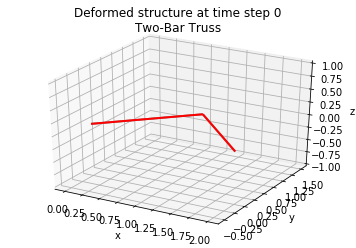

In [5]:
%matplotlib inline
#ignore the line above
show_deformation_plot(model)

### 2.3 Linear analysis

First create a new model for the first loading step. This is important because it creates a copy of the initial ```model```, that can be modified in the following analysis. This new ```linear_model``` knows that it was created from ```model```. Like this a chain of models is created for each solution step and it can be used later on to display load displacement curves, animations ...

In [6]:
# create a new model for the first solution step, using the initial model as a reference
linear_model = model.get_duplicate()

Set the load factor $\lambda$. Note that ```lambda``` is a python keyword, therefore we named the variable ```lam```

In [7]:
# define the load factor
linear_model.lam = 0.1

Perform a linear solution step

In [8]:
# perform a linear solution
linear_model.perform_linear_solution_step()

And now for a next solution step with a different load factor we repeat these steps. **Remember to duplicate the model!**

In [9]:
# create a new model for each new solution step, using the last model as a reference
linear_model = linear_model.get_duplicate() 
# define the load factor
linear_model.lam = 0.2
# perform a linear solution
linear_model.perform_linear_solution_step()

### 2.4 Non-linear analysis

For a non-linear analysis, in principle the same steps are necessary, just with a little more input needed from the user.
First create a new model for the first non-linear solution step, using the initial model as a starting point.

In [10]:
# create a new model for the first solution step, using the initial model as a reference
non_linear_model = model.get_duplicate()

Now some user input is required. There are several predictor and path following methods available in the NFEM teaching tool.
Here we choose the most simple ones, you will hear more details in the following lectures and tutorials.

In [11]:
# define the load factor
lam = 0.1

# predict a solution by prescribing the load factor
non_linear_model.predict_load_factor(lam)

There are several alternatives available for the prediction step. You can find them below.

In [12]:
# perform a non-linear solution step
non_linear_model.perform_non_linear_solution_step(strategy='load-control')

Start non linear solution step...
  Newthon-Raphson converged in step 5.
  Residual norm: 6.250451947686919e-09.
Solution found after 5 iteration steps.


And now for a next solution step with a different load factor we repeat these steps. **Remember to duplicate the model!**

In [13]:
# create a new model for each solution step, using the last model as a reference
non_linear_model = non_linear_model.get_duplicate()

# define the load factor
lam = 0.2

# predict a solution by prescribing the load factor
non_linear_model.predict_load_factor(lam)

# perform a non-linear solution step
non_linear_model.perform_non_linear_solution_step(strategy='load-control')

Start non linear solution step...
  Newthon-Raphson converged in step 14.
  Residual norm: 1.056932319443149e-13.
Solution found after 14 iteration steps.


### 2.5 Postprocessing

After you have done your calculations, you can postprocess your results.

#### Load displacement diagram

In order to compare the load displacement curves of the the linear and nonlinear analysis, you can create a 2D plot and add the load-displacement-curves of the two models. Note that you need to specify the dof you want to plot against the load factor $\lambda$. (Please ignore the ```%matplotlib inline```, it is only necessary here to show the plot directly in the manual)

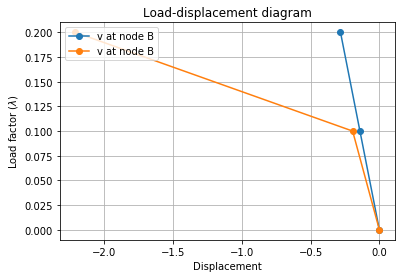

In [14]:
%matplotlib inline
#ignore the line above

# create a 2D plot 
plot = Plot2D()

# add the load-displacement curves you want to plot
plot.add_load_displacement_curve(linear_model, dof=('B', 'v'))
plot.add_load_displacement_curve(non_linear_model, dof=('B', 'v'))

# show the plot
plot.show()

#### Deformation plot

You can also visualize the deformation of the structure. As an example the linear_model is plotted.

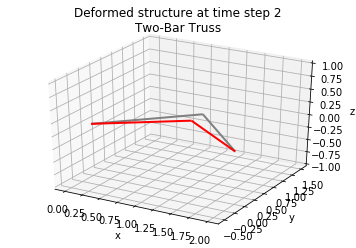

In [15]:
%matplotlib inline
#ignore the line above

# static plot
deformation_plot = DeformationPlot3D()
deformation_plot.show(linear_model)

#### Deformation animation

You can also animate the deformation history of each model, with the following command (here the first frame of the animation is shown):

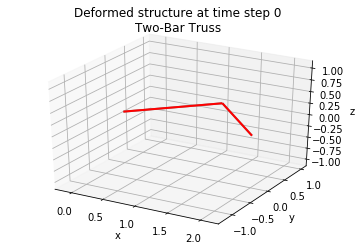

In [16]:
%matplotlib inline
#ignore the line above

# animated plot
animation = Animation3D()
animation.show(non_linear_model)

# 3. Prediciton and path following

A new equilibrium point in a non linear analysis is found by the following two steps:
- prediction
- solution

## Prediction
In the predictor step a solution is predicted, in principle you can do this by modifiing the model directly, like we did e.g. in the linear example above.

In [17]:
predicted_model = non_linear_model.get_duplicate()

# define the load factor as prediction
predicted_model.lam = 0.1


# or prescribe a the state of dof 'v' at node 'B' as prediction
predicted_model.set_dof_state(('B','v'), -0.1)

Or you use one of the predefined functions at the model to do that.

In [18]:
predicted_model = non_linear_model.get_duplicate()

# define the load factor as prediction
predicted_model.predict_load_factor(0.1)

# or increment the load factor as prediction
predicted_model.predict_load_increment(0.1)


# or prescribe a the state of dof 'v' at node 'B' as prediction
predicted_model.predict_dof_state(('B','v'), -0.1)

# or increment a the state of dof 'v' at node 'B' as prediction
predicted_model.predict_dof_increment(('B','v'), -0.1)


# or use the last invrement as prediction (requires at least 1 previous solution)
predicted_model.predict_with_last_increment()

## Solution
For the solution a constraint or also path folllowing method is necessary. There are three methods implemented.

In [19]:
# load control
predicted_model.perform_non_linear_solution_step(strategy='load-control')

# displacement control (the controlled dof needs to be specified)
predicted_model.perform_non_linear_solution_step(strategy='displacement-control', dof=('B','v'))

# arc length control
predicted_model.perform_non_linear_solution_step(strategy='arc-length-control')

Start non linear solution step...
  Newthon-Raphson converged in step 7.
  Residual norm: 3.038881424277662e-09.
Solution found after 7 iteration steps.
Start non linear solution step...
  Newthon-Raphson converged in step 1.
  Residual norm: 3.038881424277662e-09.
Solution found after 1 iteration steps.
Start non linear solution step...
  Newthon-Raphson converged in step 1.
  Residual norm: 3.038881424277662e-09.
Solution found after 1 iteration steps.


## Additional solution settings
You can control the accuracy of the Newton-Raphson solver with two additional arguments in the perform_non_linear_solution_step function

In [20]:
predicted_model.perform_non_linear_solution_step(strategy='arc-length-control', max_iterations=100, tolerance=1e-5)

Start non linear solution step...
  Newthon-Raphson converged in step 1.
  Residual norm: 3.038881424277662e-09.
Solution found after 1 iteration steps.
